<a href="https://colab.research.google.com/github/Akhilagoud12/madcode/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [7]:
dataset = pd.read_csv("/content/heart .csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [9]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [10]:
dataset["target"].unique()

array([0, 1])

In [11]:

print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


Exploratory Data Analysis (EDA)

1    526
0    499
Name: target, dtype: int64 0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


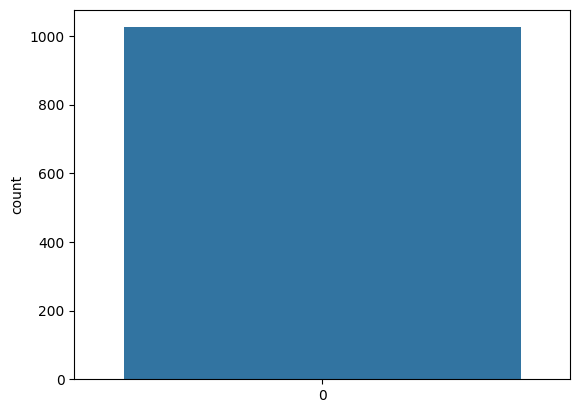

In [13]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp,y)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [15]:
dataset["sex"].unique()

array([1, 0])

<Axes: >

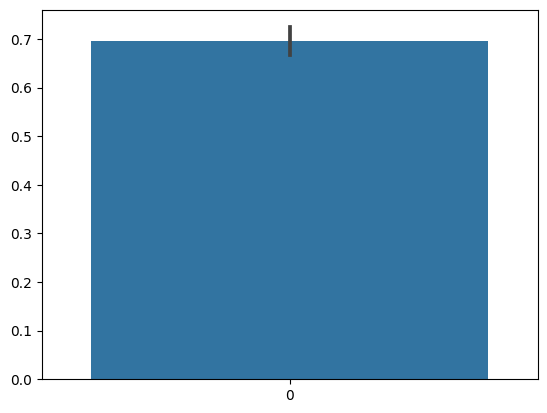

In [17]:
sns.barplot(dataset["sex"])

Analysing the 'Chest Pain Type' feature

In [18]:
dataset["cp"].unique()

array([0, 1, 2, 3])

<Axes: >

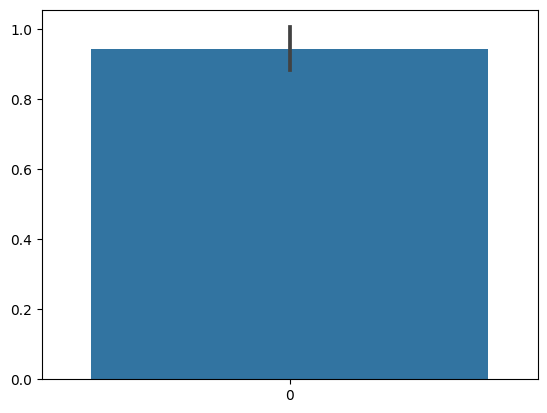

In [20]:
sns.barplot(dataset["cp"])

In [21]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

<Axes: >

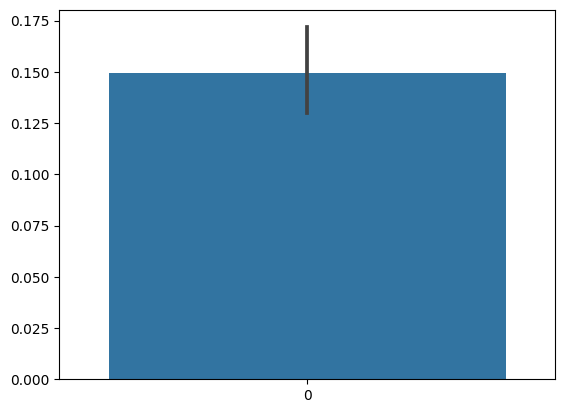

In [23]:
dataset["fbs"].unique()
sns.barplot(dataset["fbs"])

<Axes: >

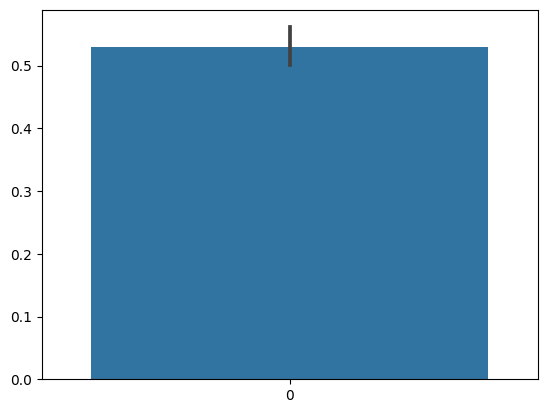

In [24]:
dataset["restecg"].unique()
sns.barplot(dataset["restecg"])

<Axes: >

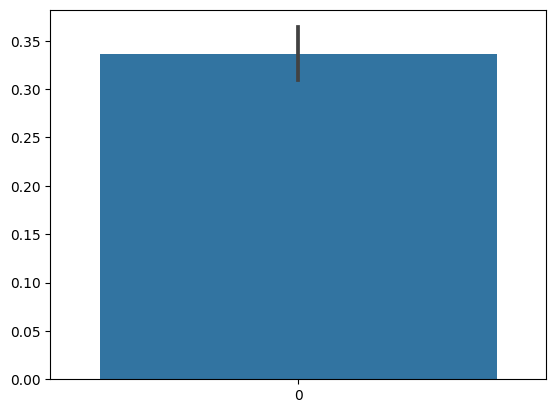

In [26]:
dataset["exang"].unique()
sns.barplot(dataset["exang"])

Analysing the 'ca' feature

<Axes: ylabel='count'>

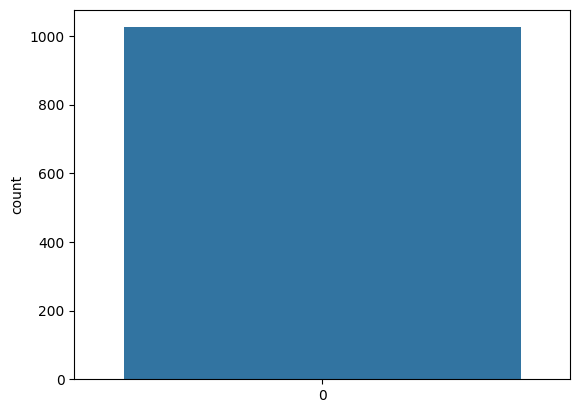

In [31]:
dataset["ca"].unique()
sns.countplot(dataset["ca"])
sns.barplot(dataset["ca"])

ca=4 has astonishingly large number of heart patients

<Axes: >

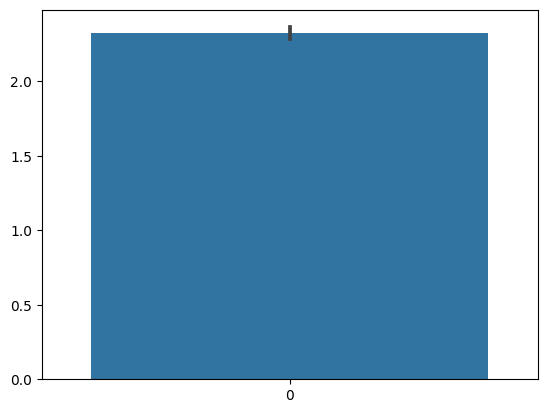

In [34]:
dataset["thal"].unique()
sns.barplot(dataset["thal"])

<Axes: xlabel='thal', ylabel='Density'>

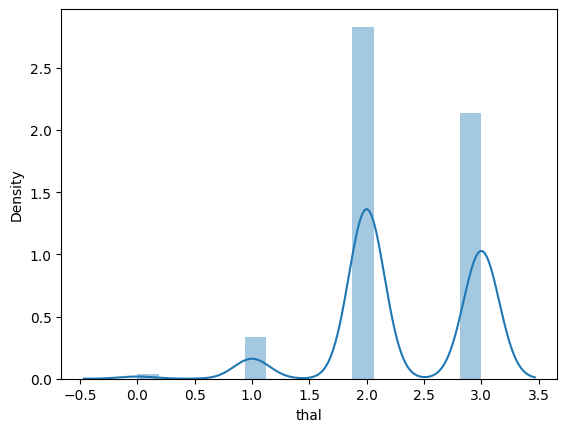

In [35]:
sns.distplot(dataset["thal"])

IV. Train Test split

In [36]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [37]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(205,)

model fitting

In [38]:
from sklearn.metrics import accuracy_score

**Logical regression**

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [40]:
Y_pred_lr.shape

(205,)

In [41]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


**Naive** **Bayes**

In [42]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [43]:
Y_pred_nb.shape

(205,)

In [44]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


**SVM**

In [45]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [46]:
Y_pred_svm.shape

(205,)

In [47]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


**K Nearest Neighbors**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [49]:
Y_pred_knn.shape

(205,)

In [50]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


**Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [52]:
print(Y_pred_dt.shape)

(205,)


In [53]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

**XGBOOST**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

**Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

In [ ]:
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded


In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

**## VI. Output final score**

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)